1 Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación como función a operar
def aptitud(x):
    return 5 * x**5 - 3 * x**4 - x**3 - 5 * x**2 - x - 3



La siguiente función calcula el valor absoluto de la ecuación 5x^5 - 3x^4 - x^3 - 5x^2 - x - 3.

    Parámetros:
    x (float): Valor para el cual se evalúa la ecuación.

    Returns:
    float: Valor absoluto de la ecuación evaluada en x.

In [ ]:
def eqc(x):
    return abs(aptitud(x))
# Parámetros del AG
pop = 100  # Población
gens = 500  # Generaciones
mut = 0.01  # Probabilidad de Mutación
cruce = 0.7  # Tasa de cruce

#Generación de población

poblacion = np.random.uniform(0.1,1,pop) #100 valores al azar entre 0.5 y 1
#print(poblacion)

Se utiliza una lista llamada mem para almacenar la mejor aptitud encontrada en cada generación. Esto será utilizado para trazar la evolución de la aptitud a lo largo del tiempo.

In [7]:

#Memoria de calificación
mem = []

for gen in range(gens): #50 iteraciones, una por generación

  #Guardar el mejor valor cada generación
  m_calif = np.array([eqc(x) for x in poblacion])                                #Evaluar cada valor en la poblacion que obtuvimos y guardarlos en un arreglo
 # print(m_calif)
  v_mejor = min(m_calif)                                                                 #Como buscamos la raíz, el valor más cercano a 0 será el mejor
  mem.append(v_mejor)                                                                 #añadimos el mejor valor a la memoria
  dec = 1e-10                                                                                 # se le sumará este valor a todos los números en caso de que alguno sea 0
  prob_s = 1 / (m_calif + dec)                                                         #la probabilidad será el inverso de  los resultados en la matriz de calificación
  prob_s = prob_s / sum(prob_s)                                                    #Normalizar los valores dividiendolos por la sumatoria
  ind_r = np.random.choice(np.arange(pop), size=pop, p=prob_s) #selección aleatoria (clasificación)
  pob_s = poblacion[ind_r]                                                                         #nueva población seleccionada, solo los valores que se encuentran en el índice de calificación

  # Cruce en un punto
  pts_cruce = np.random.randint(1, pop, size=pop)  * (np.random.random(size=pop) < cruce)                                           #Creación de los puntos de cruce, solo cruzamos el 70% de la población
  pob_c = np.array([pob_s[i] if i < point else pob_s[i - 1] for i, point in enumerate(pts_cruce)])                                          #Población de cruce, basada en la población seleccionada

  #Mutación
  mask_m = np.random.random(size = 100) < mut                             #Máscara de mutación, con probabilidad de 1%
  val_m = np.random.uniform(-0.01, 0.01, size=pop)                         #Valores de mutación, entre -0.01 y 0.01
  pob_m = pob_c + val_m * mask_m                                                  #Población mutada, basada en la población de cruce

  #Siguiente generación}
  poblacion = pob_m                             #Reemplazar la población original por la nueva
#print(mem)

In [8]:
# Mostrar la solución hallada
sol_m = poblacion[np.argmin(m_calif)]
ajuste_m = min(m_calif)
print("La raíz aproximada encontrada es:", sol_m)
print("Valor de P(x) en la raíz aproximada:", eqc(sol_m))


La raíz aproximada encontrada es: 0.11579565988351619
Valor de P(x) en la raíz aproximada: 3.1848267749383536


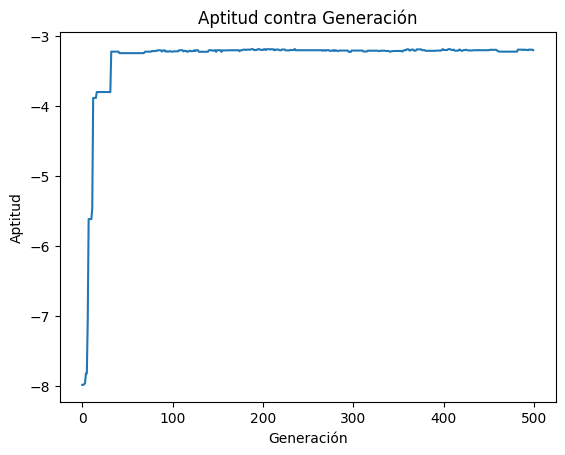

In [9]:

# Graficar aptitud contra generación
plt.plot(range(gens), mem)
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.title("Aptitud contra Generación")
plt.show()